**INTRODUCTION**

CIFAR-10 is a widely used dataset in the field of computer vision and machine learning. The dataset is designed for image classification tasks and consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class.

The ten classes in the CIFAR-10 dataset are as follows:

*Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck.*

The dataset is divided into two subsets: a training set with 50,000 images and a test set with 10,000 images. Each image is labeled with one of the ten classes, making it suitable for supervised learning tasks, particularly image classification.

In the provided code, CIFAR-10 is utilized for training a convolutional neural network (CNN) to perform image classification on the specified classes. The code includes sections for Exploratory Data Analysis, model definition, compilation, training, and evaluation, providing a comprehensive example of working with the CIFAR-10 dataset using TensorFlow and Keras.

In [1]:
# Import necessary libraries

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [2]:
# Load and preprocess the CIFAR-10 dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Define class names for CIFAR-10

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Exploratory Data Analysis (EDA)

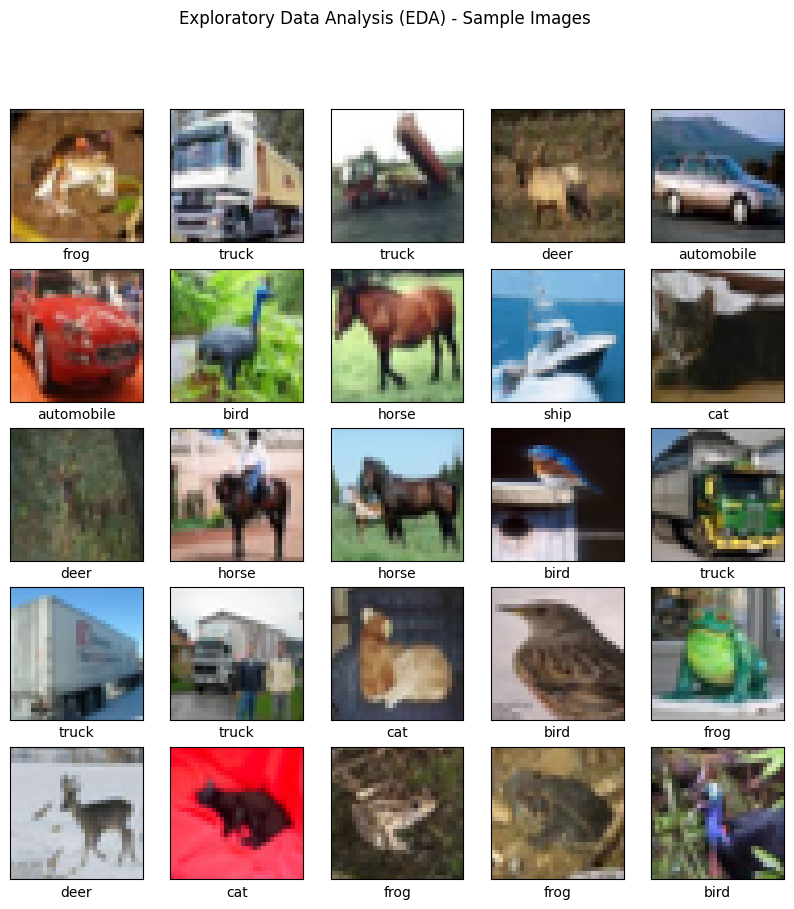

In [4]:
# Display sample images

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle('Exploratory Data Analysis (EDA) - Sample Images')
plt.show()


### MODELING

In [5]:
# Model Definition

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [6]:
# Compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
# Model Training

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 40s 24ms/step - loss: 1.5283 - accuracy: 0.4434 - val_loss: 1.2590 - val_accuracy: 0.5435
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1397 - accuracy: 0.5962 - val_loss: 1.0569 - val_accuracy: 0.6277
Epoch 3/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9825 - accuracy: 0.6528 - val_loss: 0.9606 - val_accuracy: 0.6580
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8866 - accuracy: 0.6864 - val_loss: 0.9488 - val_accuracy: 0.6695
Epoch 5/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8160 - accuracy: 0.7136 - val_loss: 0.8758 - val_accuracy: 0.6937
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7532 - accuracy: 0.7343 - val_loss: 0.8977 - val_accuracy: 0.6933
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7067 - accuracy: 0.7521 - val_loss: 0.8923 -

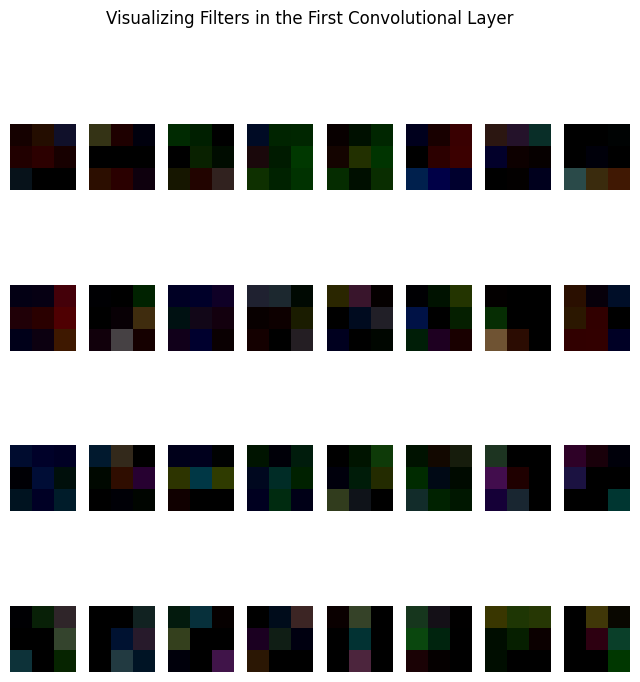

In [8]:
# Visualize filters in the first convolutional layer

plt.figure(figsize=(8, 8))
layer1_filters = model.layers[0].get_weights()[0]
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(layer1_filters[:, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Visualizing Filters in the First Convolutional Layer')
plt.show()

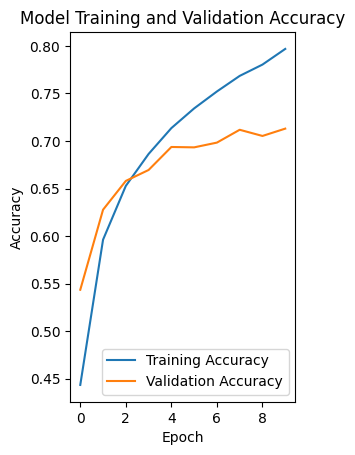

In [9]:
# Plot training accuracy and validation accuracy over epochs

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.legend(loc='lower right')



### EVALUATION

In [10]:
# Evaluate the model on the test set

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


313/313 - 3s - loss: 0.8622 - accuracy: 0.7130 - 3s/epoch - 8ms/step


313/313 [==============================] - 3s 8ms/step


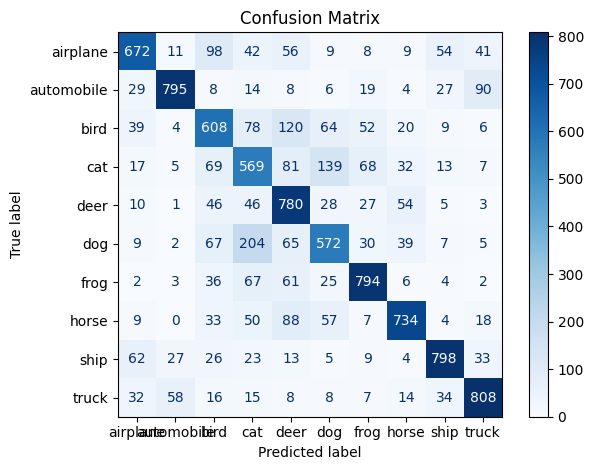

In [11]:
# Confusion Matrix for model evaluation

predictions = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, predictions, labels=np.arange(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.tight_layout()
